<a href="https://colab.research.google.com/github/blancavazquez/Escuela_Invierno2025/blob/main/notebooks/P1_Feature_extraction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller Visión Computacional e IA**

El objetivo de este taller es explorar y utilizar herramientas de visión computacional para construir modelos de segmentación de imágenes.

Taller impartido por:

* Dra. Nidiyare Hevia nidiyare.hevia@iimas.unam.mx
* Dr. Jorge Pérez jorge.perez@iimas.unam.mx
* Dra. Blanca Vázquez blanca.vazquez@iimas.unam.mx

Staff:
* Gabriel Carcedo
* Ismael Pérez




---



# Parte 1: Extracción de caractecterísticas

In [ ]:
# Montar la unidad de google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Clonar repositorio de Github
! ls
%cd /content/drive/MyDrive/
! git clone https://github.com/blancavazquez/Escuela_Invierno2025.git

'1 IIMAS Mérida'
 2024_Renovación_Blanca
 Classroom
'Colab Notebooks'
 CV
 Escuela_Invierno2025
'Formulario para registrar charlas o talleres: 8ta Escuela de Invierno.gform'
'IIMAS CU'
 Personal
 PostDoc_2023
 SNI
/content/drive/MyDrive
fatal: destination path 'Escuela_Invierno2025' already exists and is not an empty directory.


* Importar Librerias


In [ ]:
# Librerias
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from PIL import Image
from skimage.color import rgb2gray

* Leer imágenes de entrenamiento

In [ ]:
im1= skio.imread("Escuela_Invierno2025/data/im11.png")
im2= skio.imread("Escuela_Invierno2025/data/im12.png")
im3= skio.imread("Escuela_Invierno2025/data/im13.png")

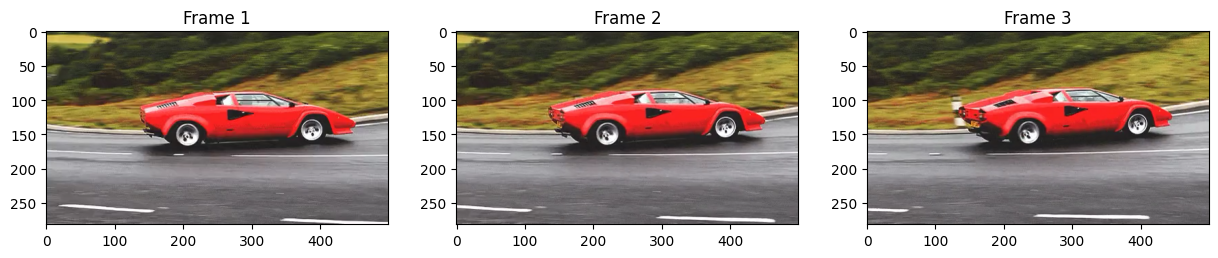

(282, 500, 3)

In [ ]:
# Mostrar algunos ejemplos de imágenes
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1)
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2)
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3)
plt.show()
im1.shape

* Funcion para concatenación y aplanamiento

In [ ]:
def imagen2vector(imagen1, imagen2, imagen3):
    v1=imagen1.flatten()
    v2=imagen2.flatten()
    v3=imagen3.flatten()
    img_vec = np.concatenate((v1, v2, v3), axis=0)
    img_vec=img_vec[:,np.newaxis]
    return img_vec

* Componentes RGB

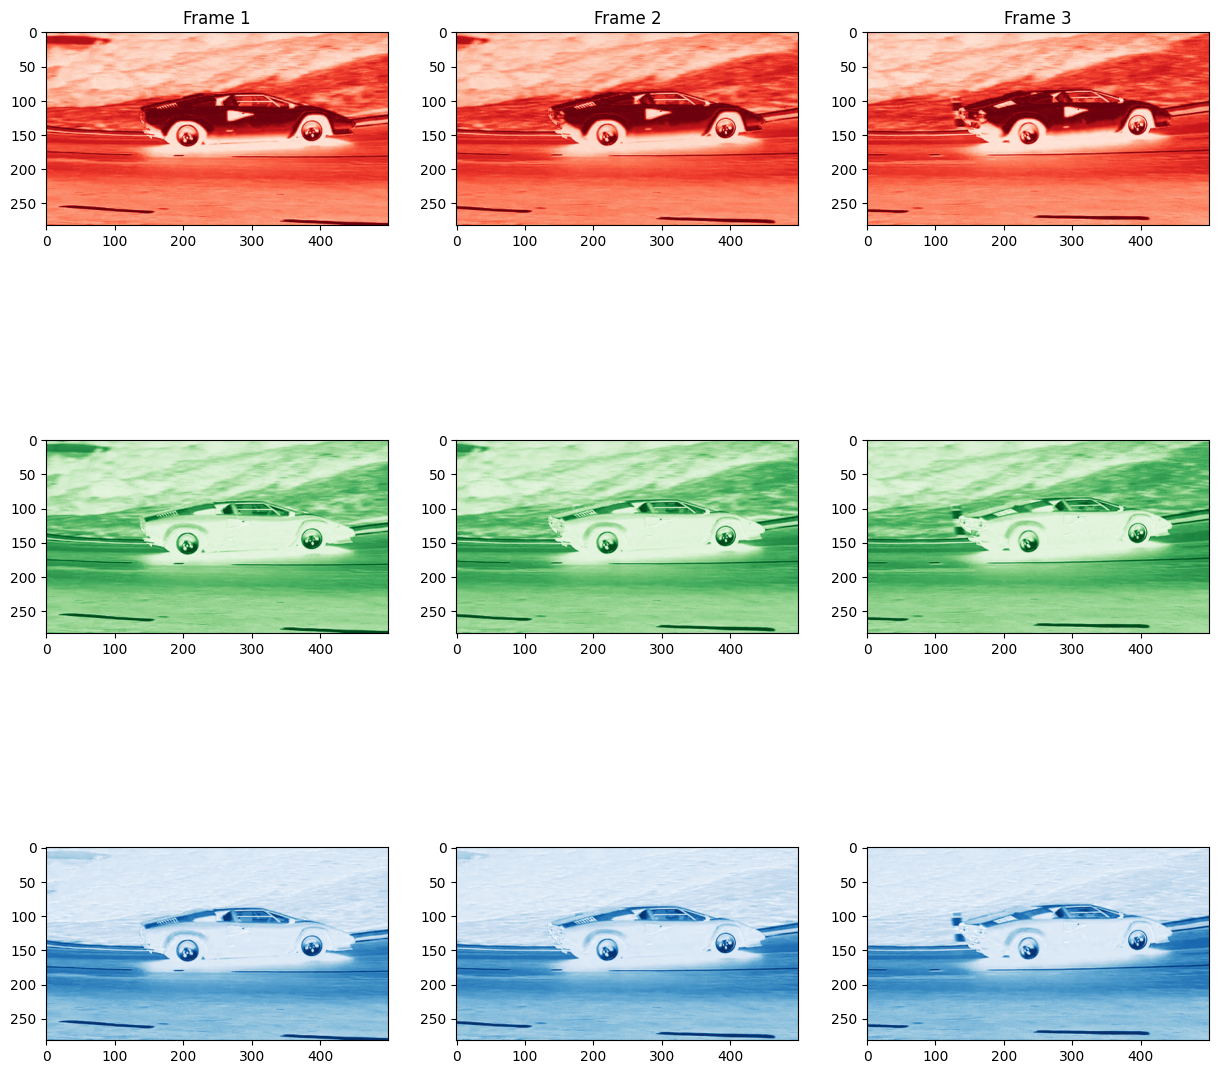

In [ ]:
im1_r = im1[:, :, 0]
im1_g = im1[:, :, 1]
im1_b = im1[:, :, 2]
im2_r = im2[:, :, 0]
im2_g = im2[:, :, 1]
im2_b = im2[:, :, 2]
im3_r = im3[:, :, 0]
im3_g = im3[:, :, 1]
im3_b = im3[:, :, 2]

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Frame 1')
plt.imshow(im1_r, cmap='Reds')
plt.subplot(3,3,4)
plt.imshow(im1_g, cmap='Greens')
plt.subplot(3,3,7)
plt.imshow(im1_b, cmap='Blues')

plt.subplot(3,3,2)
plt.title('Frame 2')
plt.imshow(im2_r, cmap='Reds')
plt.subplot(3,3,5)
plt.imshow(im2_g, cmap='Greens')
plt.subplot(3,3,8)
plt.imshow(im2_b, cmap='Blues')

plt.subplot(3,3,3)
plt.title('Frame 3')
plt.imshow(im3_r, cmap='Reds')
plt.subplot(3,3,6)
plt.imshow(im3_g, cmap='Greens')
plt.subplot(3,3,9)
plt.imshow(im3_b, cmap='Blues')
plt.show()


im_r=imagen2vector(im1_r,im2_r,im3_r)
im_g=imagen2vector(im1_g,im2_g,im3_g)
im_b=imagen2vector(im1_b,im2_b,im3_b)

* Componentes HSV

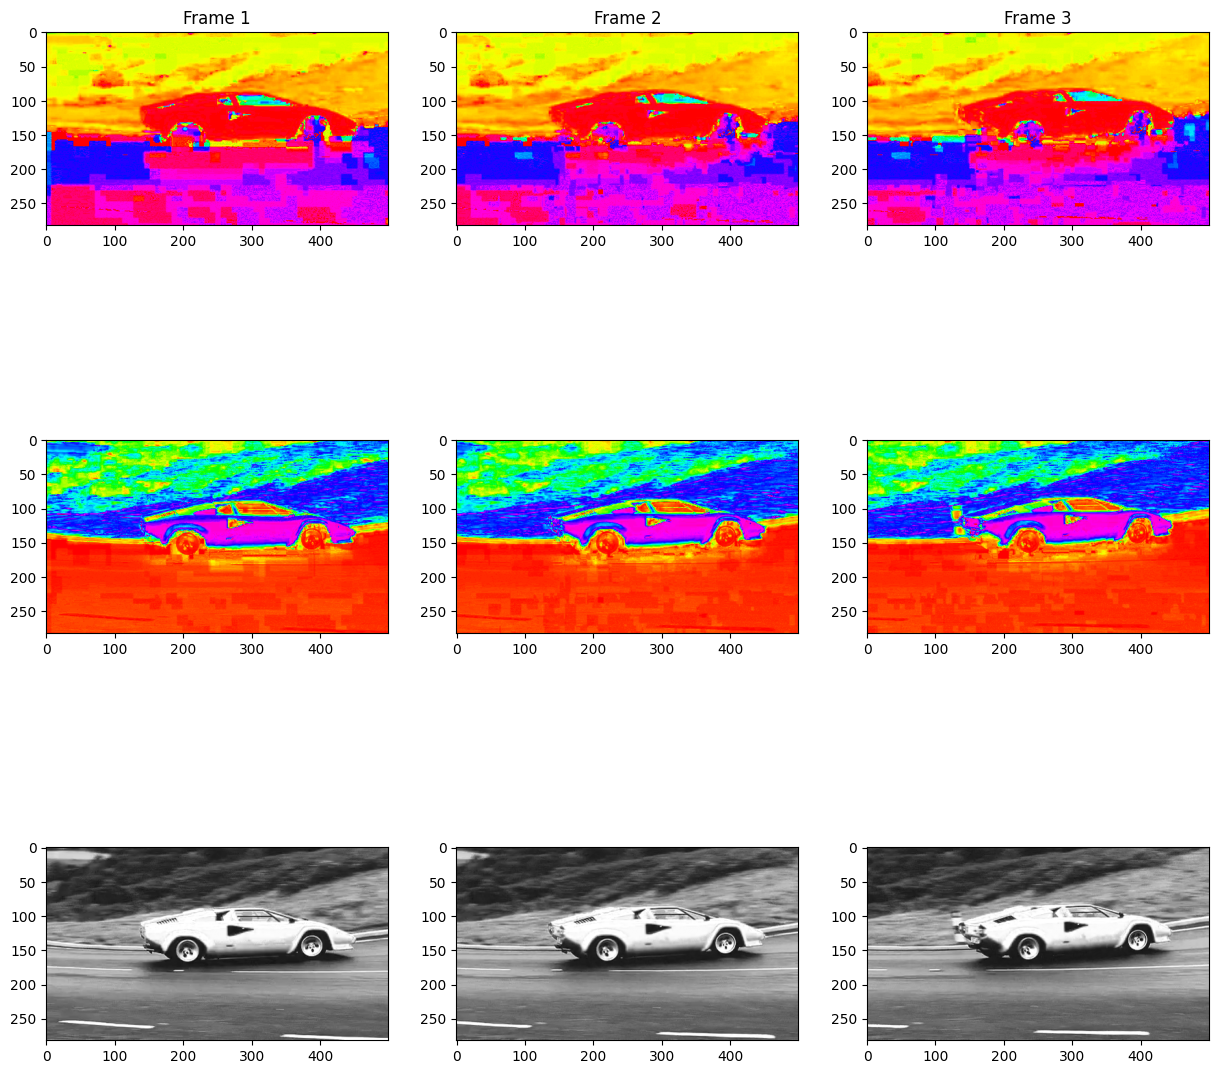

In [ ]:
from skimage.color import rgb2hsv
hsv_img1 = rgb2hsv(im1)
hsv_img2 = rgb2hsv(im2)
hsv_img3 = rgb2hsv(im3)

hue_img1 = hsv_img1[:, :, 0]
sat_img1 = hsv_img1[:, :, 1]
value_img1 = hsv_img1[:, :, 2]

hue_img2 = hsv_img2[:, :, 0]
sat_img2 = hsv_img2[:, :, 1]
value_img2 = hsv_img2[:, :, 2]

hue_img3 = hsv_img3[:, :, 0]
sat_img3 = hsv_img3[:, :, 1]
value_img3 = hsv_img3[:, :, 2]



plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Frame 1')
plt.imshow(hue_img1, cmap='hsv')
plt.subplot(3,3,4)
plt.imshow(sat_img1, cmap='hsv')
plt.subplot(3,3,7)
plt.imshow(value_img1, cmap='gray')

plt.subplot(3,3,2)
plt.title('Frame 2')
plt.imshow(hue_img2, cmap='hsv')
plt.subplot(3,3,5)
plt.imshow(sat_img2, cmap='hsv')
plt.subplot(3,3,8)
plt.imshow(value_img2, cmap='gray')

plt.subplot(3,3,3)
plt.title('Frame 3')
plt.imshow(hue_img3, cmap='hsv')
plt.subplot(3,3,6)
plt.imshow(sat_img3, cmap='hsv')
plt.subplot(3,3,9)
plt.imshow(value_img3, cmap='gray')
plt.show()


im_hue=imagen2vector(hue_img1,hue_img2,hue_img3)
im_sat=imagen2vector(sat_img1,sat_img2,sat_img3)
im_value=imagen2vector(value_img1,value_img1,value_img3)

* Escala de Grices

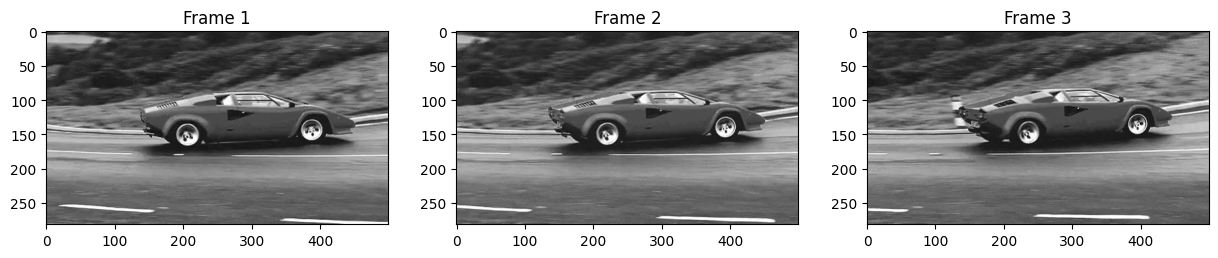

In [ ]:
im1g = rgb2gray(im1)
im2g = rgb2gray(im2)
im3g = rgb2gray(im3)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1g, cmap='gray')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2g, cmap='gray')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3g, cmap='gray')
plt.show()

im_gray=imagen2vector(im1g,im2g,im3g)

* Filtro de mediana

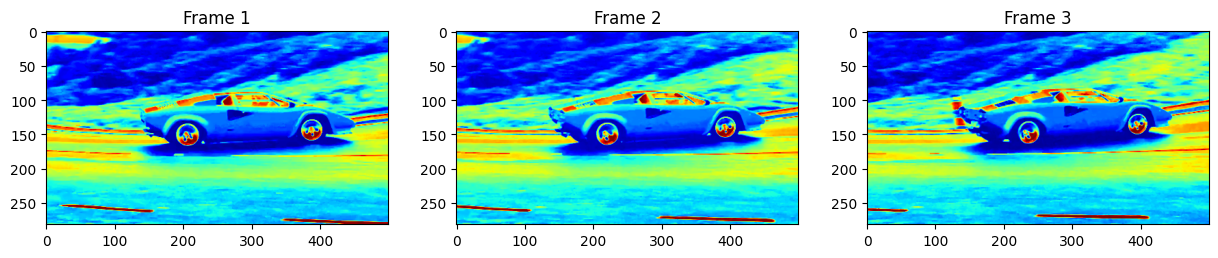

In [ ]:
from skimage.morphology import disk
from skimage.filters import median
im1m = median(im1g)
im2m = median(im2g)
im3m = median(im3g)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1m, cmap='jet')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2m, cmap='jet')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3m, cmap='jet')
plt.show()

im_median=imagen2vector(im1m,im2m,im3m)

* Filtro de Entropia

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


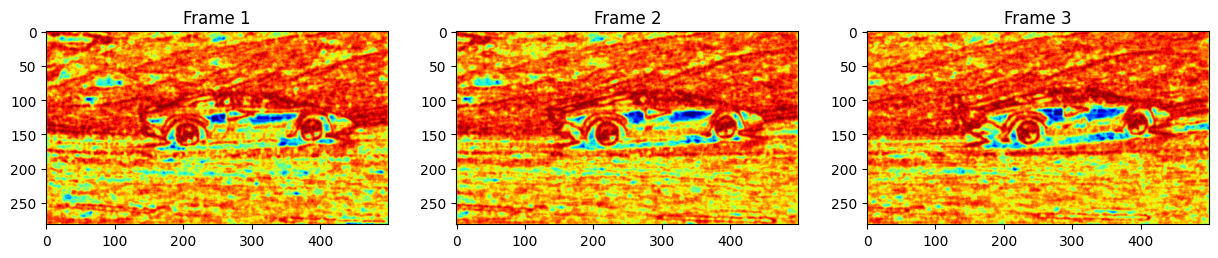

In [ ]:
from skimage.filters.rank import entropy
im1e = entropy(im1g, disk(3))
im2e = entropy(im2g, disk(3))
im3e = entropy(im3g, disk(3))
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1e, cmap='jet')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2e, cmap='jet')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3e, cmap='jet')
plt.show()

im_entropy=imagen2vector(im1e,im2e,im3e)

* Bordes de Sobel

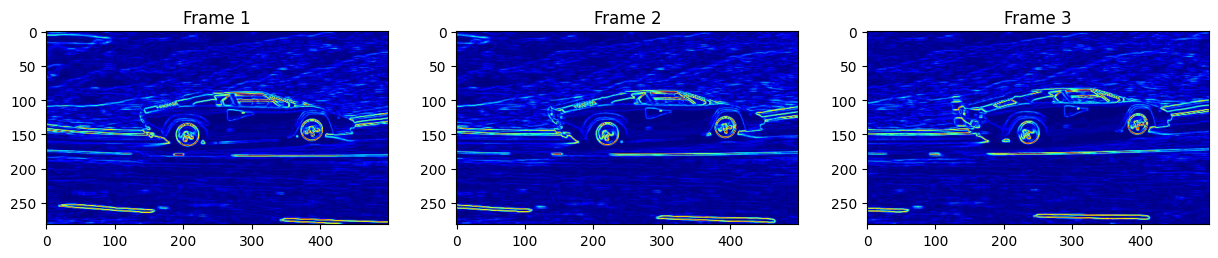

In [ ]:
from skimage.filters import sobel

im1so = sobel(im1g)
im2so = sobel(im2g)
im3so = sobel(im3g)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1so, cmap='jet')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2so, cmap='jet')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3so, cmap='jet')
plt.show()

im_sobel=imagen2vector(im1so,im2so,im3so)

* Patrones locales binarios

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


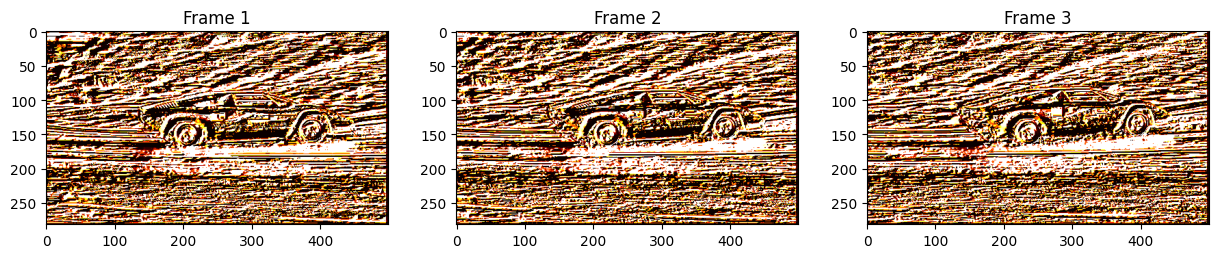

In [ ]:
from skimage.feature import local_binary_pattern
radius = 3
n_points = 8 * radius
im1_lp = local_binary_pattern(im1g, n_points, radius)
im2_lp = local_binary_pattern(im2g, n_points, radius)
im3_lp = local_binary_pattern(im3g, n_points, radius)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1_lp, cmap='hot')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2_lp, cmap='hot')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3_lp, cmap='hot')
plt.show()

im_local_bin=imagen2vector(im1_lp,im2_lp,im3_lp)

* Etiquetas/Anotaciones/Máscaras/Labels

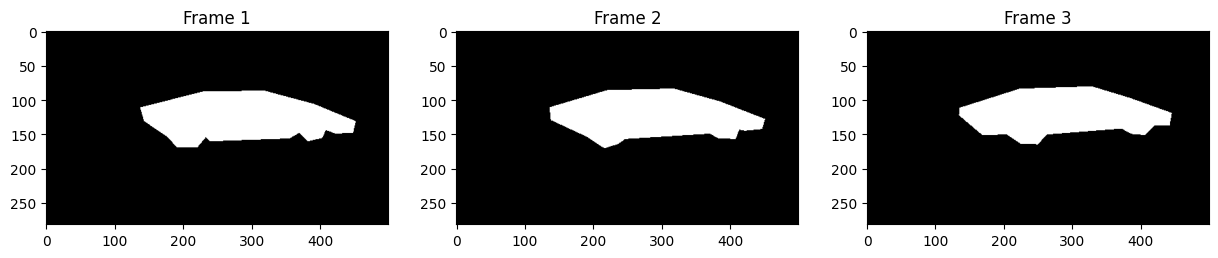

In [ ]:
from sklearn.preprocessing import MinMaxScaler
label_im1= skio.imread("Escuela_Invierno2025/data/seg11.png")
label_im2= skio.imread("Escuela_Invierno2025/data/seg12.png")
label_im3= skio.imread("Escuela_Invierno2025/data/seg13.png")

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(label_im1, cmap='gray')
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(label_im2, cmap='gray')
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(label_im3, cmap='gray')
plt.show()

im_label=imagen2vector(label_im1,label_im2,label_im3)
im_label = MinMaxScaler().fit_transform(im_label)

* Ordenamiento de los datos

In [ ]:
# Ordenamiento de los datos
import pandas as pd
data=np.concatenate([im_r, im_g, im_b,im_hue, im_sat, im_value, im_gray,im_median,im_entropy,im_sobel,im_local_bin,im_label], axis = 1)
df = pd.DataFrame(data, columns=["Rojo", "Verde","Azul","Hue", "Saturation","Valor", "Grices","Mediana","Entropia","Sobel","Patrones_locales","Labels"])

df

Rojo  Verde  Azul       Hue  Saturation     Valor    Grices  \
0       101.0   99.0  72.0  0.155172    0.287129  0.396078  0.382268   
1       105.0  102.0  76.0  0.149425    0.276190  0.411765  0.395149   
2       110.0  107.0  81.0  0.149425    0.263636  0.431373  0.414756   
3       114.0  112.0  85.0  0.155172    0.254386  0.447059  0.433248   
4       122.0  120.0  93.0  0.155172    0.237705  0.478431  0.464621   
...       ...    ...   ...       ...         ...       ...       ...   
422995   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422996   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422997   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422998   89.0   86.0  89.0  0.833333    0.033708  0.349020  0.340603   
422999   89.0   86.0  89.0  0.833333    0.033708  0.349020  0.340603   

         Mediana  Entropia     Sobel  Patrones_locales  Labels  
0       0.382268  3.459432  0.069689               1.0     0.0  
1       0.382268  3.807355  0.076497               1.0     0.0  
2       0.395149  4.087463  0.083973               1.0     0.0  
3       0.414756  4.169925  0.095359               1.0     0.0  
4       0.433248  4.058814  0.106739               1.0     0.0  
...          ...       ...       ...               ...     ...  
422995  0.344525  2.572431  0.008611            8162.0     0.0  
422996  0.344525  2.794653  0.007730            8160.0     0.0  
422997  0.344525  2.698660  0.007938            8160.0     0.0  
422998  0.344525  2.753434  0.006807            7648.0     0.0  
422999  0.340603  2.845351  0.003594            7360.0     0.0  

[423000 rows x 12 columns]



---



# Parte 2: Construcción de un segmentador basado en KNN

In [ ]:
# Número de clases
print(df.groupby('Labels').size())

Labels
0.0    370530
1.0     52470
dtype: int64


* Selección empírica de variables

In [ ]:
# Seleccion de variables

#variables=["Rojo","Saturation","Mediana"]
#variables=["Rojo"]
#X=df.loc[:,variables] # Conjunto de entramiento

# Sin seleccion de variables
array = df.values
X=array[:,0:-1] # Para seleccionar todas las variables
y=array[:,-1] # Etiquetas
names=df.columns[0:-1]

In [ ]:
# Particion de datos para validacion
from sklearn.model_selection import train_test_split
X_entrenamiento,X_test,Y_entrenamiento,Y_test=train_test_split(X,y,test_size=30,
                                                    random_state=50)


## Clasificacion / entrenamiento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=4, n_jobs=-1) #K=50?? (vecinos)
clf.fit(X_entrenamiento, Y_entrenamiento)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

## Validacion

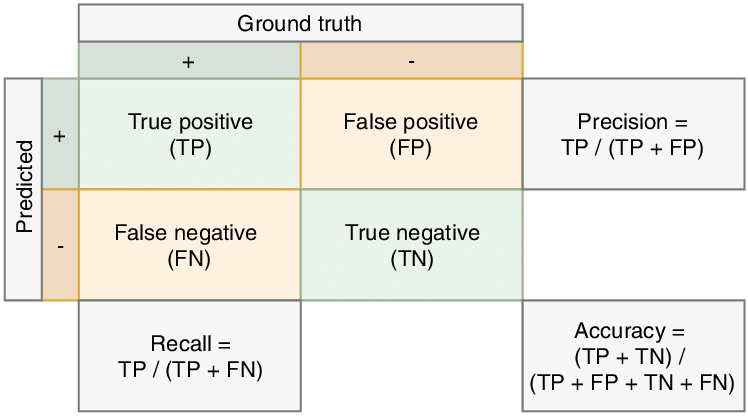

In [ ]:
# Calcular tasa de clasificaciones correctas
from sklearn.model_selection import cross_val_score
print ('Accuracy:')
print((clf.score(X_test,Y_test))*100)

Accuracy:
96.66666666666667


In [ ]:
# Predicciones por cada pixel
Y_pred=clf.predict(X_test)
Y_predn=Y_pred[:,np.newaxis]
Y_testn=Y_test[:,np.newaxis]
resultados=np.concatenate([Y_predn, Y_testn], axis = 1)
resul = pd.DataFrame(resultados, columns=["Predicciones", "Reales"])
resul

Predicciones  Reales
0            0.0     0.0
1            0.0     0.0
2            1.0     0.0
3            0.0     0.0
4            0.0     0.0
5            0.0     0.0
6            0.0     0.0
7            0.0     0.0
8            0.0     0.0
9            0.0     0.0
10           0.0     0.0
11           0.0     0.0
12           0.0     0.0
13           0.0     0.0
14           0.0     0.0
15           0.0     0.0
16           0.0     0.0
17           1.0     1.0
18           0.0     0.0
19           0.0     0.0
20           0.0     0.0
21           0.0     0.0
22           0.0     0.0
23           0.0     0.0
24           0.0     0.0
25           0.0     0.0
26           0.0     0.0
27           0.0     0.0
28           1.0     1.0
29           0.0     0.0

In [ ]:
# Probabilidades
Y_proba=clf.predict_proba(X_test)
Proba_1=Y_proba[:,0]
Proba_0=Y_proba[:,1]
Proba_0=(Proba_0[:,np.newaxis])*100
Proba_1=(Proba_1[:,np.newaxis])*100
resultados2=np.concatenate([Y_predn, Y_testn, Proba_1, Proba_0], axis = 1)
resul2 = pd.DataFrame(resultados2, columns=["Predicciones", "Reales","% Fondo","% Auto"])
resul2

Predicciones  Reales  % Fondo  % Auto
0            0.0     0.0    100.0     0.0
1            0.0     0.0    100.0     0.0
2            1.0     0.0      0.0   100.0
3            0.0     0.0    100.0     0.0
4            0.0     0.0    100.0     0.0
5            0.0     0.0    100.0     0.0
6            0.0     0.0    100.0     0.0
7            0.0     0.0    100.0     0.0
8            0.0     0.0    100.0     0.0
9            0.0     0.0    100.0     0.0
10           0.0     0.0    100.0     0.0
11           0.0     0.0    100.0     0.0
12           0.0     0.0    100.0     0.0
13           0.0     0.0    100.0     0.0
14           0.0     0.0    100.0     0.0
15           0.0     0.0     75.0    25.0
16           0.0     0.0    100.0     0.0
17           1.0     1.0      0.0   100.0
18           0.0     0.0    100.0     0.0
19           0.0     0.0    100.0     0.0
20           0.0     0.0    100.0     0.0
21           0.0     0.0    100.0     0.0
22           0.0     0.0    100.0     0.0
23           0.0     0.0     75.0    25.0
24           0.0     0.0    100.0     0.0
25           0.0     0.0    100.0     0.0
26           0.0     0.0    100.0     0.0
27           0.0     0.0    100.0     0.0
28           1.0     1.0      0.0   100.0
29           0.0     0.0    100.0     0.0

## 4. Uso :)

In [ ]:
# Funcion para concatenar
def imagen2vector_test(imagen1):
    v1=imagen1.flatten()
    img_vec=v1[:,np.newaxis]
    return img_vec

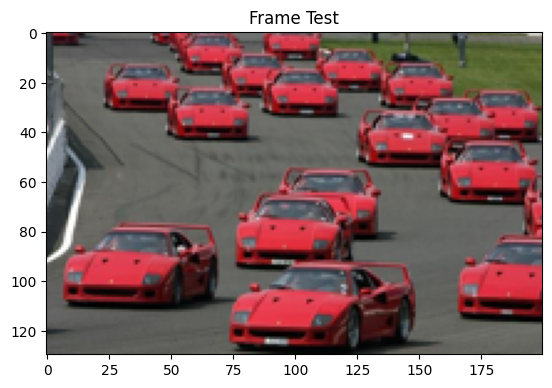

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
im_test= Image.open("Escuela_Invierno2025/data/multiples_cars.jpeg")

im_test = np.array(im_test.resize((200, 130)))
# Despliegue
plt.title('Frame Test')
plt.imshow(im_test)
plt.show()

# RGB components
im_r = imagen2vector_test(im_test[:, :, 0])
im_g = imagen2vector_test(im_test[:, :, 1])
im_b = imagen2vector_test(im_test[:, :, 2])

# HSV componets
hsv_test = rgb2hsv(im_test)
hue_test = imagen2vector_test(hsv_test[:, :, 0])
sat_test = imagen2vector_test(hsv_test[:, :, 1])
value_test = imagen2vector_test(hsv_test[:, :, 2])

# Gray
img_test = imagen2vector_test(rgb2gray(im_test))

# Mediana
imm = imagen2vector_test(median(img_test, disk(5)))

# Entropia
ime = imagen2vector_test(entropy(img_test, disk(9)))

# Sobel
imso = imagen2vector_test(sobel(img_test))

# Patrones locales binarios
radius = 3
n_points = 8 * radius
imlp = imagen2vector_test(local_binary_pattern(img_test, n_points, radius))

In [ ]:
ima_concatenada=np.concatenate([im_r, im_g, im_b, hue_test, sat_test, value_test, img_test, imm,ime,imso,imlp], axis = 1)
df_test = pd.DataFrame(ima_concatenada, columns=["Rojo", "Verde","Azul","Hue", "Saturation","Valor", "Grices","Mediana","Entropia","Sobel","Patrones_locales"])

# Seleccion de variables
#ima_test=df_test.loc[:,variables]

# Sin seleccion de variables
ima_test = df_test.values

In [ ]:
df_test

Rojo  Verde   Azul       Hue  Saturation     Valor    Grices  \
0       58.0   77.0   82.0  0.534722    0.292683  0.321569  0.287541   
1       47.0   65.0   62.0  0.472222    0.276923  0.254902  0.239054   
2       94.0   52.0   55.0  0.988095    0.446809  0.368627  0.239770   
3      200.0   75.0   90.0  0.980000    0.625000  0.784314  0.402525   
4      212.0   52.0   69.0  0.982292    0.754717  0.831373  0.342062   
...      ...    ...    ...       ...         ...       ...       ...   
25995  100.0  101.0   95.0  0.194444    0.059406  0.396078  0.393549   
25996  101.0  102.0   96.0  0.194444    0.058824  0.400000  0.397470   
25997  103.0  104.0   98.0  0.194444    0.057692  0.407843  0.405313   
25998  106.0  107.0  102.0  0.200000    0.046729  0.419608  0.417361   
25999  103.0  104.0   99.0  0.200000    0.048077  0.407843  0.405596   

        Mediana  Entropia     Sobel  Patrones_locales  
0      0.287541  2.921928  0.034286          262144.0  
1      0.287541  3.095795  0.033779          262144.0  
2      0.287541  3.251629  0.115592          262144.0  
3      0.342062  3.392747  0.072331               0.0  
4      0.345960  3.521641  0.039998          262144.0  
...         ...       ...       ...               ...  
25995  0.393549  2.610577  0.011092          262144.0  
25996  0.397470  2.565448  0.008319          262144.0  
25997  0.405313  2.625815  0.014065               0.0  
25998  0.405596  2.663533  0.000200               0.0  
25999  0.405596  2.446439  0.008319               0.0  

[26000 rows x 11 columns]

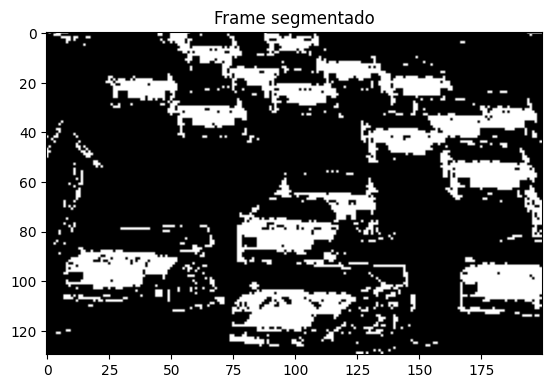

In [ ]:
# Segmentacion con el modelo ya entrenado
ima_segmetada=clf.predict(ima_test)

ima_segmetada=ima_segmetada.reshape(130, 200)
# Despliegue
plt.title('Frame segmentado')
plt.imshow(ima_segmetada, cmap='gray')
plt.show()

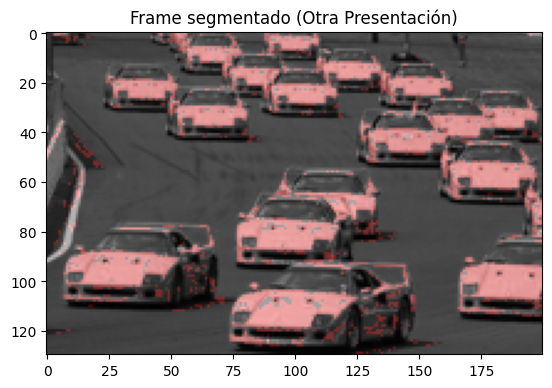

In [ ]:
# Otra presentación del frame segmentado
from skimage.measure import label, regionprops
from skimage.color import label2rgb
image_label = label2rgb(ima_segmetada, image=im_test, bg_label=0)
# Despliegue
plt.title('Frame segmentado (Otra Presentación)')
plt.imshow(image_label)
plt.show()

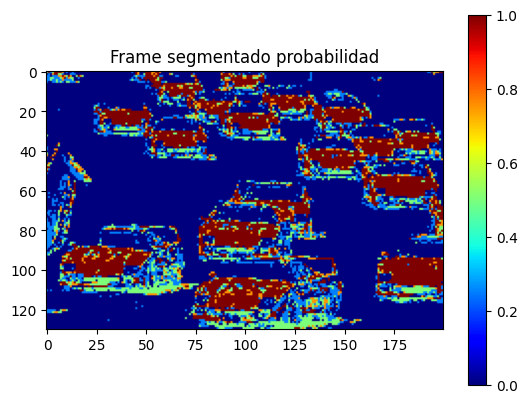

In [ ]:
#Mapa de probabilidades
ima_segmetada_pro=clf.predict_proba(ima_test)
ima_segmetada_pro=ima_segmetada_pro[:,1]

ima_segmetada_pro=ima_segmetada_pro.reshape(130, 200)
# Despliegue
plt.title('Frame segmentado probabilidad')
plt.imshow(ima_segmetada_pro, cmap='jet')
plt.colorbar()
plt.show()

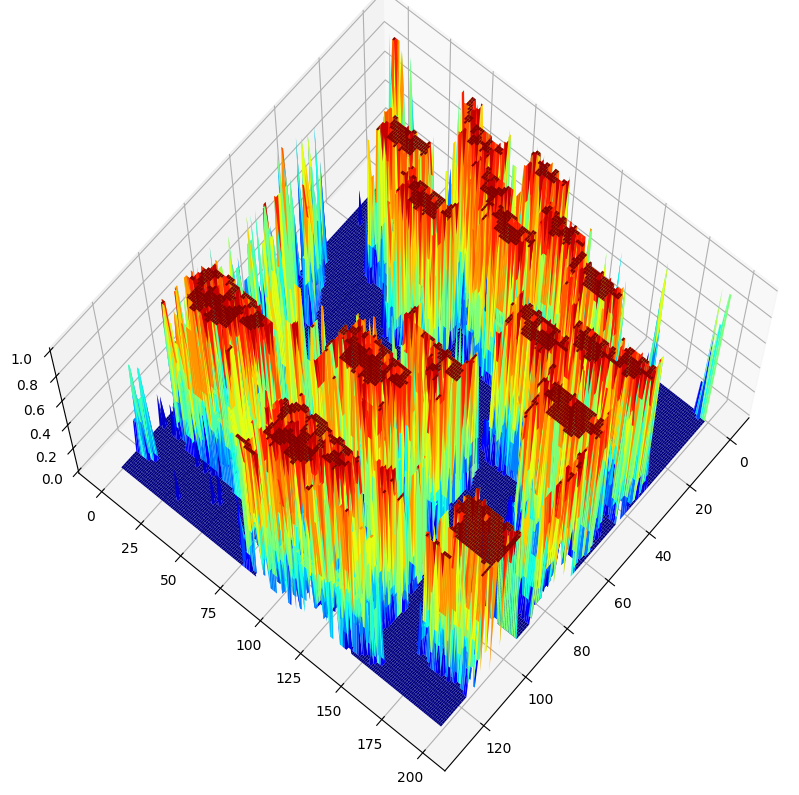

In [ ]:
#Mapa de probalidades (otra representación)
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.mgrid[0:ima_segmetada_pro.shape[0], 0:ima_segmetada_pro.shape[1]]

fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, ima_segmetada_pro,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)

ax.view_init(70, 40)
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


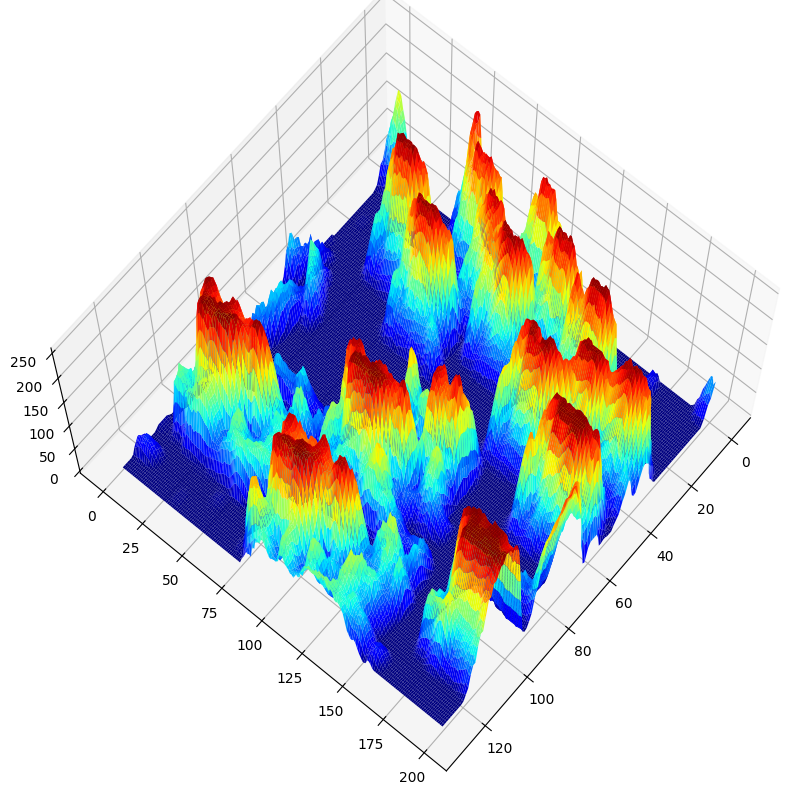

In [ ]:
# Filtrado
from skimage.filters.rank import mean

ima_segmetada_pro = mean(ima_segmetada_pro, disk(3))

xx, yy = np.mgrid[0:ima_segmetada_pro.shape[0], 0:ima_segmetada_pro.shape[1]]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, ima_segmetada_pro,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)

ax.view_init(70, 40)
plt.show()


In [ ]:
# Selección de un umbral para mejor segmentación
ima_segmetada_pro_bin=ima_segmetada_pro>170

<ipython-input-86-c1a23a0c7aeb>:16: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  bw = closing(image > thresh, square(3))


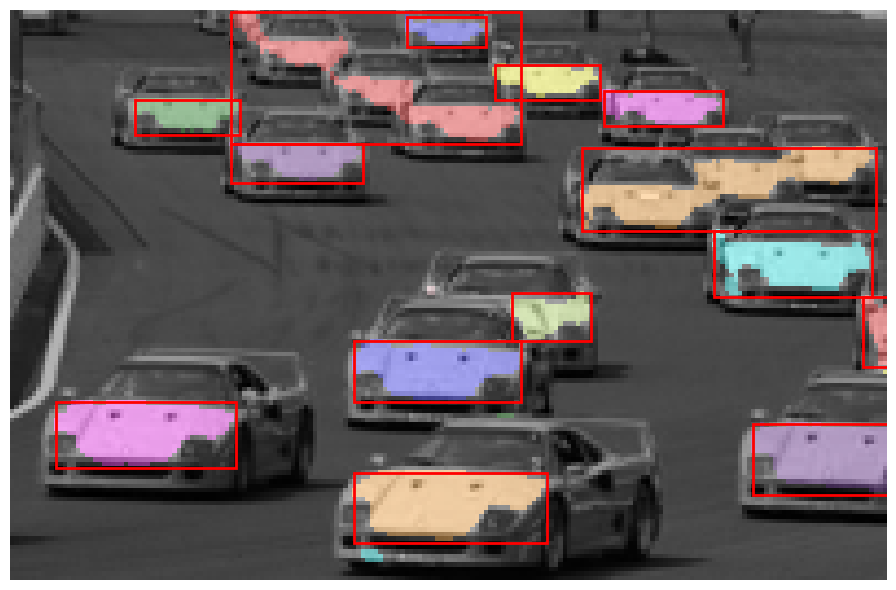

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = ima_segmetada_pro_bin

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=im_test, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 20:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()